In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random

In [ ]:
#Load the dataset
!pip install xlrd==1.2.0
from google.colab import files
file = files.upload()  #upload file into google colab session
train_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
test_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')
train_df.head()

     |████████████████████████████████| 103 kB 5.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


Saving Lab3_data.xls to Lab3_data.xls


,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [ ]:
test_df.head()

,y,x1,x2
0,1,71.0,140
1,1,74.0,185
2,1,70.0,145
3,1,67.0,145
4,1,72.0,170


# Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, X_train, y_train, X_test, y_test, learningRate, tolerance, maxIteration, rm_index = False):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.rm_index = rm_index
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0]]), X])
        
    # remove index function
    def remove_index(self, X, rm_index):
        if not(rm_index == False):
          print('Removing ', X[rm_index])
          return np.delete(X, rm_index, 0)
        else:
          return X
    
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred_.sum()
        return cost
    
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            curr = self.costFunction(X, y)
            
            diff = last - curr
            last = curr
            
            errors.append(curr)
            if diff< self.tolerance:
                print("Model stopped")
                break
                
        self.plot_cost(errors)### plot Function
        
        
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        precision = (y & y_hat).sum() / y_hat.sum()
        
        recall = (y & y_hat).sum() / y.sum()
        fScore = 2 * (precision * recall) / (precision + recall)
        
        return fScore, recall, precision
    
    def fit(self, X, y):
        y_hat = self.predict(X)
        fScore, recall, precision = self.evaluate(y, y_hat)
        print('F1_score: ', fScore)
        print('Recall: ', recall)
        print('Precison: ', precision)


    def run_model(self):
      
        # initiate the w
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0

        # remove index from data
        self.X_train = self.remove_index(self.X_train, self.rm_index)
        self.y_train = self.remove_index(self.y_train, self.rm_index)

        # start modeling
        self.gradientDescent(self.X_train, self.y_train)
        #self.X_train = self.X
        #self.y_train = self.y
        print(self.w)

        print('Evaluation on training data is:', self.fit(self.X_train, self.y_train))
        print('Evaluation on testing data is:', self.fit(self.X_test, self.y_test))
        
    


    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()
        
    

In [ ]:
train_X, train_y = train_df.values[:, 1:], train_df.values[:, 0]
test_X, test_y = test_df.values[:, 1:], test_df.values[:, 0]


### 1. original data





In [ ]:
lr = LogisticRegression(train_X, train_y, test_X, test_y, learningRate = 0.000001,
                       tolerance = 0.0000005, maxIteration = 50000, rm_index = False)

100%|██████████| 50000/50000 [00:01<00:00, 30881.57it/s]
No handles with labels found to put in legend.


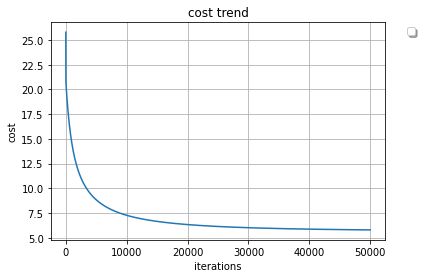

[-0.47594792  0.23071008]
F1_score:  0.9722222222222222
Recall:  0.9722222222222222
Precison:  0.9722222222222222
Evaluation on training data is: None
F1_score:  0.9333333333333332
Recall:  0.9459459459459459
Precison:  0.9210526315789473
Evaluation on testing data is: None


In [ ]:
lr.run_model()

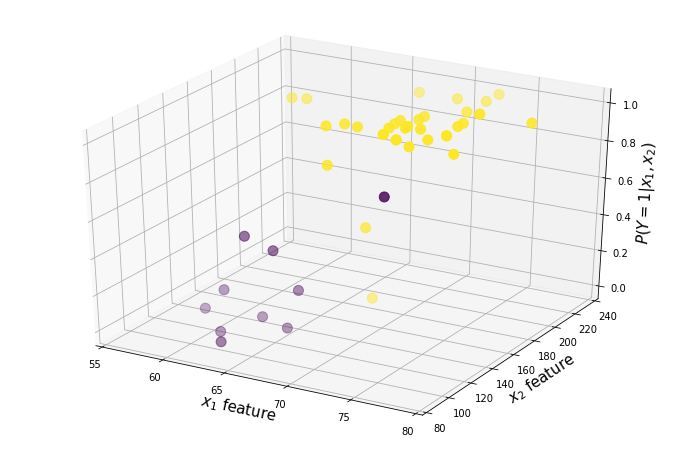

In [ ]:
lr.plot()

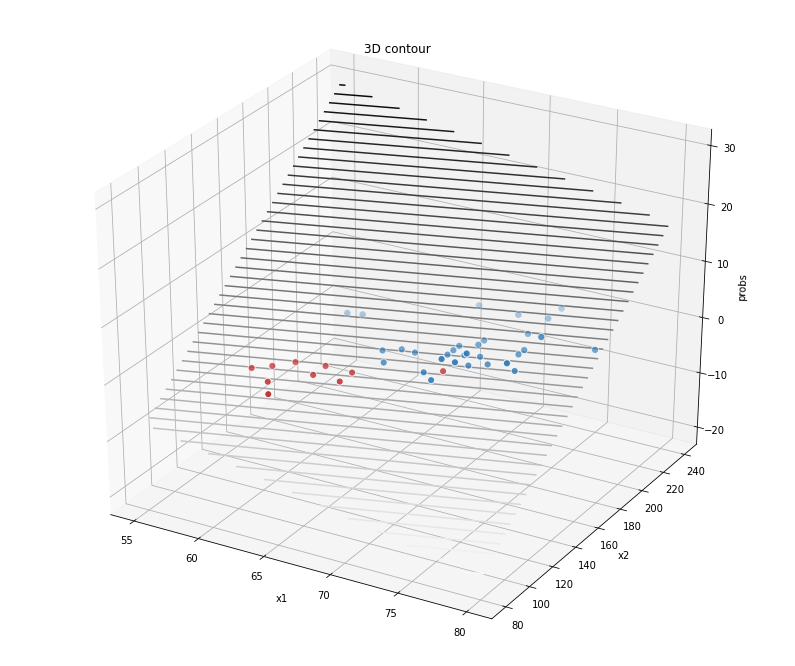

In [ ]:
lr.plot3D()

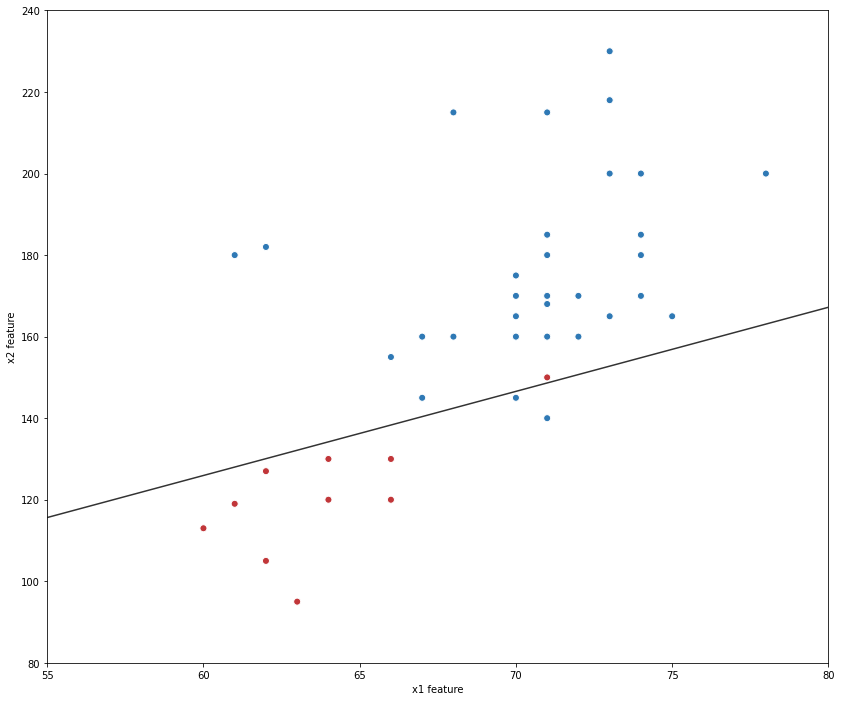

In [ ]:
lr.scatterPlt()

### 2. remove point 1 and 39

In [ ]:
lr_rm = LogisticRegression(train_X, train_y, test_X, test_y, learningRate = 0.0000001,
                       tolerance = 0.0000005, maxIteration = 500000, rm_index = [0, 38])

Removing  [[ 71 140]
 [ 71 150]]
Removing  [1 0]


100%|██████████| 500000/500000 [00:15<00:00, 32156.54it/s]
No handles with labels found to put in legend.


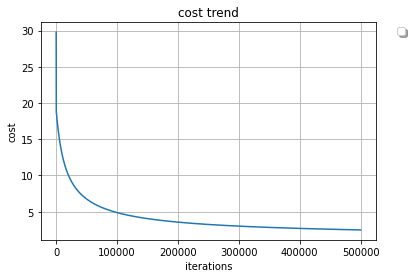

[-0.55204982  0.26666162]
F1_score:  1.0
Recall:  1.0
Precison:  1.0
Evaluation on training data is: None
F1_score:  0.9333333333333332
Recall:  0.9459459459459459
Precison:  0.9210526315789473
Evaluation on testing data is: None


In [ ]:
lr_rm.run_model()

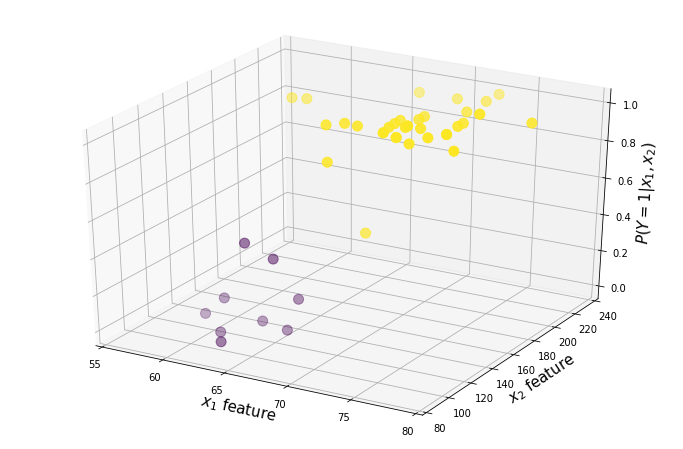

In [ ]:
lr_rm.plot()

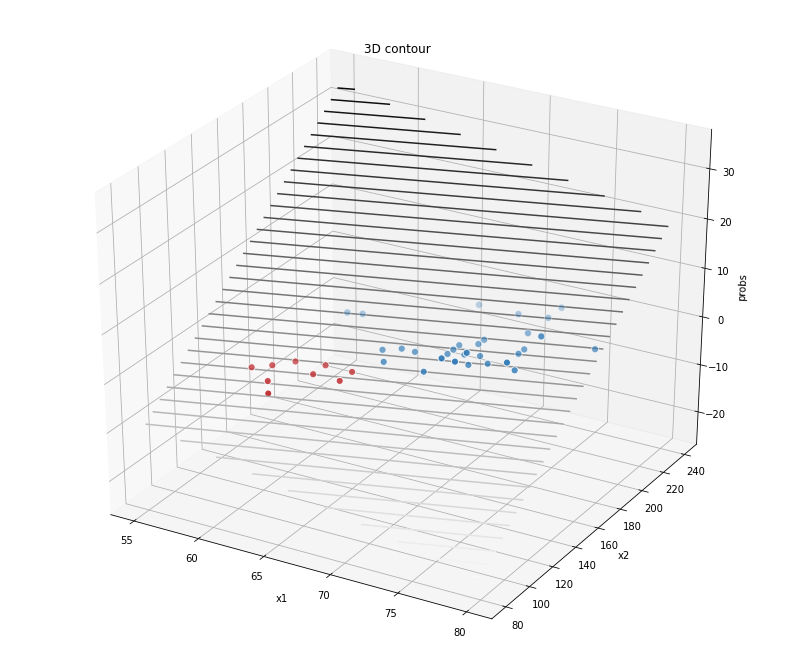

In [ ]:
lr_rm.plot3D()

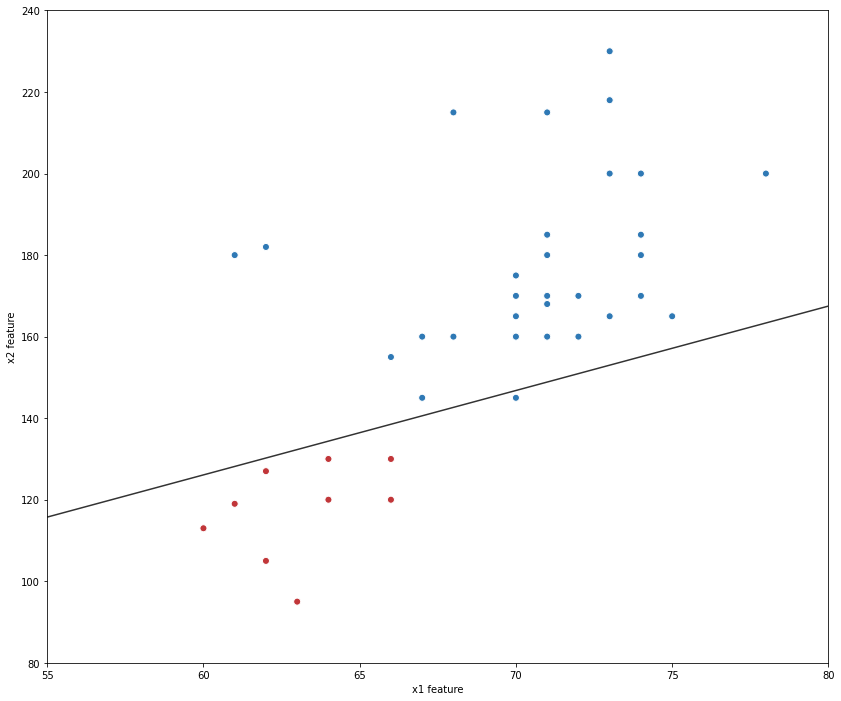

In [ ]:
lr_rm.scatterPlt()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


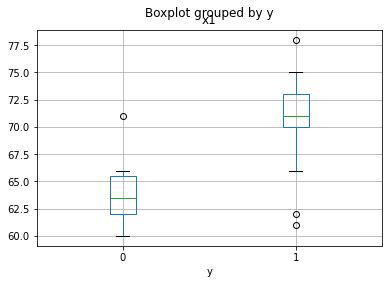

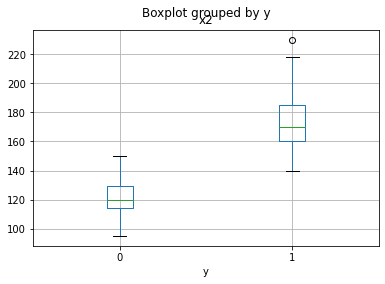

In [ ]:
train_df.boxplot(column='x1', by='y')
train_df.boxplot(column='x2', by='y')
plt.show()



*   Interpretation : We can conclude that after removing these two points(1 and 39), F1 score, recall and precision increase at the same time. Comparing the two boundary plots, we can see the two points which we remove are predicted by mistake in the first model. And also from the distribution boxplot, we can see indeed there are overlapping parts, which lead to not divide separately.



# Naive Bayes

## 1. Gaussian Naive Bayes

In [ ]:
from sklearn.datasets import make_blobs
from scipy.stats import norm

In [ ]:
# Gaussian NB
X, y = make_blobs(n_samples = 10000, centers = 2, n_features = 2, random_state = 1)
X

array([[-3.05837272,  4.48825769],
       [-8.60973869, -3.72714879],
       [ 1.37129721,  5.23107449],
       ...,
       [-1.91854276,  4.59578307],
       [-1.79600465,  4.28743568],
       [-9.90967641, -4.69510878]])

In [ ]:
class Gaussian_NaiveBayes:
    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, 
                                                                                random_state = 0)
    
    def fit_distribution(self, data):
        mean = np.mean(data)
        sigma = np.std(data)
        dist = norm(mean, sigma)
        return dist
    
    def probability_gaussian(self, X, prior, dist1, dist2):
        return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])
    
          

    def fit_gaussian(self):
      # divide into two target value
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
      # calculate prior of two target
        self.prior_y0 = len(self.X0_train) / len(self.X)
        self.prior_y1 = len(self.X1_train) / len(self.X)
        
      # calculate the P(x|y)
        self.dist_X0y0 = self.fit_distribution(self.X0_train[:,0])
        self.dist_X1y0 = self.fit_distribution(self.X0_train[:,1])
        
        self.dist_X0y1 = self.fit_distribution(self.X1_train[:,0])
        self.dist_X1y1 = self.fit_distribution(self.X1_train[:,1])
        

    def predict(self):
        count = 0
        for sample, target in zip(self.X_test, self.y_test):
            py0 = self.probability_gaussian(sample, self.prior_y0, self.dist_X0y0, self.dist_X1y0)
            py1 = self.probability_gaussian(sample, self.prior_y1, self.dist_X0y1, self.dist_X1y1)
            
            print("P(y=0|%s) = %.3f" % (sample, py0*100))
            print("P(y=1|%s) = %.3f" % (sample, py1*100))
        
            print('Model predicted class {} and the truth was: {}\n'.format(np.argmax([py0*100,
                                                                                  py1*100]), target))
            if np.argmax([py0*100,py1*100]) != target:
                count +=1
        print(count)


In [ ]:
nb = Gaussian_NaiveBayes(X, y)

In [ ]:
nb.fit_gaussian()

In [ ]:
nb.predict()

流式输出内容被截断，只能显示最后 5000 行内容。
P(y=1|[-10.59517616  -3.99820675]) = 4.588
Model predicted class 1 and the truth was: 1

P(y=0|[-11.64586896  -3.55556409]) = 0.000
P(y=1|[-11.64586896  -3.55556409]) = 1.300
Model predicted class 1 and the truth was: 1

P(y=0|[-9.93851372 -2.79086708]) = 0.000
P(y=1|[-9.93851372 -2.79086708]) = 2.793
Model predicted class 1 and the truth was: 1

P(y=0|[-10.85674833  -3.7476321 ]) = 0.000
P(y=1|[-10.85674833  -3.7476321 ]) = 3.701
Model predicted class 1 and the truth was: 1

P(y=0|[-1.77616752  4.59309106]) = 5.420
P(y=1|[-1.77616752  4.59309106]) = 0.000
Model predicted class 0 and the truth was: 0

P(y=0|[-10.67373263  -3.54544511]) = 0.000
P(y=1|[-10.67373263  -3.54544511]) = 4.002
Model predicted class 1 and the truth was: 1

P(y=0|[-10.7136271   -4.46537352]) = 0.000
P(y=1|[-10.7136271   -4.46537352]) = 3.735
Model predicted class 1 and the truth was: 1

P(y=0|[-1.8852545   4.37740679]) = 5.403
P(y=1|[-1.8852545   4.37740679]) = 0.000
Model predicted cl

## 2. Discrete Navie Bayes

In [ ]:
#Discrete NB
w = np.random.randint(0, 2, size=(1000, 3))
w = pd.DataFrame(w, columns=['X1', 'X2', 'y'])
w.head()

,X1,X2,y
0,0,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,0,0,1


In [ ]:
X, y = w.values[:,:2], w.values[:, 2]

In [ ]:
class Discrete_NaiveBayes:
    def __init__(self, X, y, discrete = False, laplacesmoothing = False) -> None:
        self.X = X
        self.y = y
        self.laplacesmoothing = laplacesmoothing
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, 
                                                                                random_state = 0)

    def probability_discrete(self, X, prior, prob00, prob01, prob10, prob11):
        if (X[0] ==0):
          if (X[1]==0):
            return prior * prob00 * prob10
          elif (X[1]==1):
            return prior * prob00 * prob11

        elif (X[0] ==1):
          if (X[1]==0):
            return prior * prob01 * prob10
          elif (X[1]==1):
            return prior * prob01 * prob11
          
        
    def fit_discrete(self):
      # divide into two target value
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        
      # calculate prior of two target
        self.prior_y0 = len(self.X0_train) / len(self.X)
        self.prior_y1 = len(self.X1_train) / len(self.X)

        if (not self.laplacesmoothing):
        # calculate the P(x|y==0)
          self.prob_X00y0 = len(self.X0_train[self.X0_train[:,0]==0]) / len(self.X0_train)
          self.prob_X01y0 = len(self.X0_train[self.X0_train[:,0]==1]) / len(self.X0_train)
          self.prob_X10y0 = len(self.X0_train[self.X0_train[:,1]==0]) / len(self.X0_train)
          self.prob_X11y0 = len(self.X0_train[self.X0_train[:,1]==1]) / len(self.X0_train)
        # calculate the P(x|y==1)
          self.prob_X00y1 = len(self.X1_train[self.X1_train[:,0]==0]) / len(self.X1_train)
          self.prob_X01y1 = len(self.X1_train[self.X1_train[:,0]==1]) / len(self.X1_train)
          self.prob_X10y1 = len(self.X1_train[self.X1_train[:,1]==0]) / len(self.X1_train)
          self.prob_X11y1 = len(self.X1_train[self.X1_train[:,1]==1]) / len(self.X1_train)
        elif (self.laplacesmoothing):
          m_x0 = len(np.unique(self.X[:,0]))
          m_x1 = len(np.unique(self.X[:,1]))
          t = random.randint(1, 10)
        # calculate the P(x|y==0)
          self.prob_X00y0 = (len(self.X0_train[self.X0_train[:,0]==0]) + t) / (len(self.X0_train) + m_x0 * t)
          self.prob_X01y0 = (len(self.X0_train[self.X0_train[:,0]==1]) + t) / (len(self.X0_train) + m_x0 * t)
          self.prob_X10y0 = (len(self.X0_train[self.X0_train[:,1]==0]) + t) / (len(self.X0_train) + m_x1 * t)
          self.prob_X11y0 = (len(self.X0_train[self.X0_train[:,1]==1]) + t) / (len(self.X0_train) + m_x1 * t)
        # calculate the P(x|y==1)
          self.prob_X00y1 = (len(self.X1_train[self.X1_train[:,0]==0]) + t)  / (len(self.X1_train) + m_x0 * t)
          self.prob_X01y1 = (len(self.X1_train[self.X1_train[:,0]==1]) + t)  / (len(self.X1_train) + m_x0 * t)
          self.prob_X10y1 = (len(self.X1_train[self.X1_train[:,1]==0]) + t)  / (len(self.X1_train) + m_x1 * t)
          self.prob_X11y1 = (len(self.X1_train[self.X1_train[:,1]==1]) + t)  / (len(self.X1_train) + m_x1 * t)

    def predict(self):
        count = 0
        for sample, target in zip(self.X_test, self.y_test):
            py0 = self.probability_discrete(sample, self.prior_y0, self.prob_X00y0, self.prob_X01y0, self.prob_X10y0, self.prob_X11y0)
            py1 = self.probability_discrete(sample, self.prior_y1, self.prob_X00y1, self.prob_X01y1, self.prob_X10y1, self.prob_X11y1)
            
            print("P(y=0|%s) = %.3f" % (sample, py0 * 100))
            print("P(y=1|%s) = %.3f" % (sample, py1 * 100))
        
            print('Model predicted class {} and the truth was: {}\n'.format(np.argmax([py0*100,
                                                                                  py1*100]), target))
            if np.argmax([py0*100,py1*100]) != target:
                count +=1
        print(count)

In [ ]:
nb_discrete = Discrete_NaiveBayes(X, y)

In [ ]:
nb_discrete.fit_discrete()

In [ ]:
nb_discrete.predict()

P(y=0|[1 0]) = 8.377
P(y=1|[1 0]) = 8.421
Model predicted class 1 and the truth was: 0

P(y=0|[1 1]) = 8.823
P(y=1|[1 1]) = 8.279
Model predicted class 0 and the truth was: 1

P(y=0|[1 0]) = 8.377
P(y=1|[1 0]) = 8.421
Model predicted class 1 and the truth was: 1

P(y=0|[0 0]) = 8.523
P(y=1|[0 0]) = 9.379
Model predicted class 1 and the truth was: 0

P(y=0|[0 1]) = 8.977
P(y=1|[0 1]) = 9.221
Model predicted class 1 and the truth was: 0

P(y=0|[0 0]) = 8.523
P(y=1|[0 0]) = 9.379
Model predicted class 1 and the truth was: 0

P(y=0|[0 0]) = 8.523
P(y=1|[0 0]) = 9.379
Model predicted class 1 and the truth was: 1

P(y=0|[1 1]) = 8.823
P(y=1|[1 1]) = 8.279
Model predicted class 0 and the truth was: 0

P(y=0|[0 0]) = 8.523
P(y=1|[0 0]) = 9.379
Model predicted class 1 and the truth was: 1

P(y=0|[1 1]) = 8.823
P(y=1|[1 1]) = 8.279
Model predicted class 0 and the truth was: 1

P(y=0|[1 0]) = 8.377
P(y=1|[1 0]) = 8.421
Model predicted class 1 and the truth was: 0

P(y=0|[1 1]) = 8.823
P(y=1|[1 1]



*   Laplace Smoothing




In [ ]:
nb_laplace = Discrete_NaiveBayes(X, y, laplacesmoothing = True)
nb_laplace.fit_discrete()
nb_laplace.predict()

P(y=0|[1 0]) = 8.390
P(y=1|[1 0]) = 8.439
Model predicted class 1 and the truth was: 0

P(y=0|[1 1]) = 8.817
P(y=1|[1 1]) = 8.303
Model predicted class 0 and the truth was: 1

P(y=0|[1 0]) = 8.390
P(y=1|[1 0]) = 8.439
Model predicted class 1 and the truth was: 1

P(y=0|[0 0]) = 8.530
P(y=1|[0 0]) = 9.355
Model predicted class 1 and the truth was: 0

P(y=0|[0 1]) = 8.964
P(y=1|[0 1]) = 9.204
Model predicted class 1 and the truth was: 0

P(y=0|[0 0]) = 8.530
P(y=1|[0 0]) = 9.355
Model predicted class 1 and the truth was: 0

P(y=0|[0 0]) = 8.530
P(y=1|[0 0]) = 9.355
Model predicted class 1 and the truth was: 1

P(y=0|[1 1]) = 8.817
P(y=1|[1 1]) = 8.303
Model predicted class 0 and the truth was: 0

P(y=0|[0 0]) = 8.530
P(y=1|[0 0]) = 9.355
Model predicted class 1 and the truth was: 1

P(y=0|[1 1]) = 8.817
P(y=1|[1 1]) = 8.303
Model predicted class 0 and the truth was: 1

P(y=0|[1 0]) = 8.390
P(y=1|[1 0]) = 8.439
Model predicted class 1 and the truth was: 0

P(y=0|[1 1]) = 8.817
P(y=1|[1 1]

In [ ]:
import numpy as np

a=[1,2,3]
np.array(a)

array([1, 2, 3])